In [35]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]


A = imread(os.path.join('DATA','dog.jpg'))
X = np.mean(A,-1); # Convert RGB to grayscale

U, S, VT = np.linalg.svd(X,full_matrices=True)
S = np.diag(S)

n,m=U.shape

#choose r=5
r=5
Uapprox = U[:,:r]

print("Size of U*U = ",(Uapprox.T @ Uapprox).shape)
print("\nU*U = ",(Uapprox.T @ Uapprox))
print("\nSize of UU* = ",(Uapprox @ Uapprox.T).shape)
print("\nUU* = ",(Uapprox @ Uapprox.T))

Size of U*U =  (5, 5)

U*U =  [[ 1.00000000e+00 -1.21430643e-17  1.07552856e-16  7.63278329e-17
   9.71445147e-17]
 [-1.21430643e-17  1.00000000e+00 -3.67761377e-16 -8.97719399e-17
  -2.99998741e-16]
 [ 1.07552856e-16 -3.67761377e-16  1.00000000e+00 -2.71917905e-16
  -3.46944695e-17]
 [ 7.63278329e-17 -8.97719399e-17 -2.71917905e-16  1.00000000e+00
   4.61436445e-16]
 [ 9.71445147e-17 -2.99998741e-16 -3.46944695e-17  4.61436445e-16
   1.00000000e+00]]

Size of UU* =  (2000, 2000)

UU* =  [[0.00089887 0.00089614 0.00089176 ... 0.00101196 0.00100403 0.0009955 ]
 [0.00089614 0.00089347 0.0008891  ... 0.00101128 0.00100347 0.00099508]
 [0.00089176 0.0008891  0.00088482 ... 0.00100843 0.00100076 0.00099251]
 ...
 [0.00101196 0.00101128 0.00100843 ... 0.00145208 0.00145133 0.00145301]
 [0.00100403 0.00100347 0.00100076 ... 0.00145133 0.00145106 0.00145325]
 [0.0009955  0.00099508 0.00099251 ... 0.00145301 0.00145325 0.00145605]]


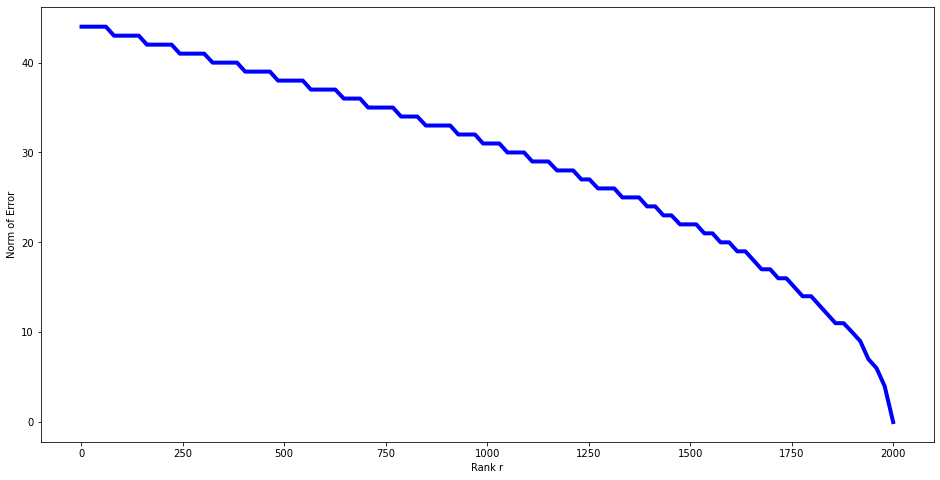

In [34]:
u=np.linspace(1,n,100,dtype=int)
err= np.zeros_like(u)

#Compute norm of errors as rank r goes from 1 to n
for i in range(u.shape[0]):
    err[i]=np.linalg.norm(U[:,:u[i]]@U[:,:u[i]].T - np.identity(n))
    
plt.xlabel('Rank r')
plt.ylabel('Norm of Error')
plt.plot(u,err,color='b',linewidth=4, label='Error')